# Train a MLR model on the event stream as output of the DVS
## Makes a training set

In [5]:
%load_ext autoreload
%autoreload 2

from aprovhots import fit_MLR, predict_data
from dataset_creation import Synthetic_Dataset
from HOTS.tools import score_classif_events, get_dataset_info, get_loader
from HOTS.network import network
import tonic

path = '/home/INT/grimaldi.a/Documents/projets/WP3/2021-12-06_simulator_data/'
patch_size = (16,16)
max_duration = None
date = '2022-01-03'
# we set tau_cla emprirically based on the ISI for SEA samples (see Make_dataset notebook)
tau_cla = 200*patch_size[0]*patch_size[1]*2

trainset = Synthetic_Dataset(save_to=path, train=True, patch_size=patch_size, max_duration=max_duration)
testset = Synthetic_Dataset(save_to=path, train=False, patch_size=patch_size, max_duration=max_duration)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


number of samples in the trainset: 192
number of samples in the testset: 64
----------------------------------------
mean value for the recording time: 974453.027 ms
mean value for the number of events: 231911
mean value for the interspike interval: 148808 us
----------------------------------------


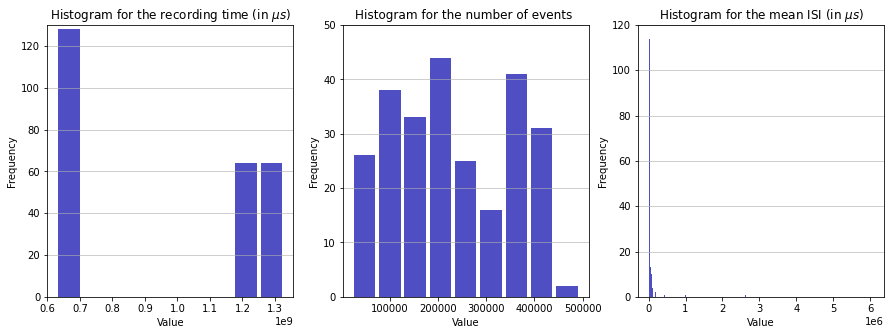

In [6]:
get_dataset_info(trainset, testset)

## Train MLR model on the raw stream of events

In [5]:
MLR_model, losses = fit_MLR(path, date, tau_cla, patch_size=patch_size, kfold=10)

Number of training samples: 18
device -> cuda - num workers -> 0


RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

In [ ]:
likelihood, true_target = predict_data(path, date, tau_cla, patch_size=patch_size, kfold=10)

In [ ]:
meanac, onlinac, lastac, truepos, falsepos = score_classif_events(likelihood, true_target)

### Higher threshold

In [ ]:
meanac, onlinac, lastac, truepos, falsepos = score_classif_events(likelihood, true_target, thres=0.9)

## Train MLR model on the output of HOTS network (classic architecture)
### 1. Train the network

In [ ]:
trainset = Synthetic_Dataset(save_to=path, train=True, patch_size = patch_size, max_duration = max_duration, transform = tonic.transforms.NumpyAsType(int))
testset = Synthetic_Dataset(save_to=path, train=False, patch_size = patch_size, max_duration = max_duration, transform = tonic.transforms.NumpyAsType(int))

get_dataset_info(trainset, testset)

In [ ]:
kfold = 2
loader = get_loader(dataset, kfold=kfold)
print(f'Size of Dataloader: {len(loader)} samples')

In [ ]:
prototau = 148

timestr = f'2022-01-03_synthetic_{patch_size}_{max_duration}'
name = 'homhots'
tau = (prototau*2,prototau*4,prototau*8)
homeo = (2,1)
learn = True

hots = network(name=name, tau=tau, homeo=homeo, timestr=timestr)
hots.running(loader, dataset.ordering, dataset.classes, learn=learn)
hots.plotlayer();